In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.impute import KNNImputer
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project1_Linear_regression")

In [43]:
pwd


'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project1_Linear_regression'

In [44]:
data=pd.read_csv(r"ML Linear Regression Home Price Prediction & Analysis Project  Resource16932049360.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [46]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [47]:
## find percentage of missing values columns wise
(data.isnull().sum()/len(data))*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [48]:
imputer=KNNImputer(n_neighbors=3)

In [49]:
missing_values=["Price","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude"]


In [50]:
num_col=data.select_dtypes(exclude="object")
cat_col=data.select_dtypes(include="object")

In [51]:
num_col.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [11]:
num_col1=pd.DataFrame(num_col)
num_col=pd.DataFrame(imputer.fit_transform(num_col1),columns=num_col.columns)

In [12]:
num_col.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [13]:
num_col

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,6.823333e+05,2.5,3067.0,2.0,1.000000,1.0,126.000000,79.000000,1981.333333,-37.801400,144.99580,4019.0
1,2.0,1.480000e+06,2.5,3067.0,2.0,1.000000,1.0,202.000000,82.333333,1934.666667,-37.799600,144.99840,4019.0
2,2.0,1.035000e+06,2.5,3067.0,2.0,1.000000,0.0,156.000000,79.000000,1900.000000,-37.807900,144.99340,4019.0
3,3.0,1.242333e+06,2.5,3067.0,3.0,2.000000,1.0,0.000000,106.000000,2006.666667,-37.811400,145.01160,4019.0
4,3.0,1.465000e+06,2.5,3067.0,3.0,2.000000,0.0,134.000000,150.000000,1900.000000,-37.809300,144.99440,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4.0,1.480000e+06,6.3,3013.0,4.0,1.000000,3.0,593.000000,174.666667,1983.000000,-37.810530,144.88467,6543.0
34853,2.0,8.880000e+05,6.3,3013.0,2.0,2.000000,1.0,98.000000,104.000000,2018.000000,-37.815510,144.88826,6543.0
34854,2.0,7.050000e+05,6.3,3013.0,2.0,1.000000,2.0,220.000000,120.000000,2000.000000,-37.822860,144.87856,6543.0
34855,3.0,1.140000e+06,6.3,3013.0,3.0,1.333333,2.0,331.666667,130.333333,1963.333333,-37.817567,144.88932,6543.0


In [14]:
num_col["YearBuilt"]=num_col["YearBuilt"].astype(int)

# outlier treatment in numeric columns

<Axes: >

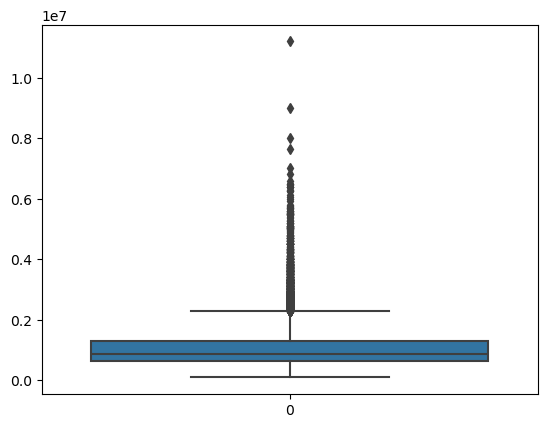

In [15]:
sns.boxplot(data["Price"])

<Axes: >

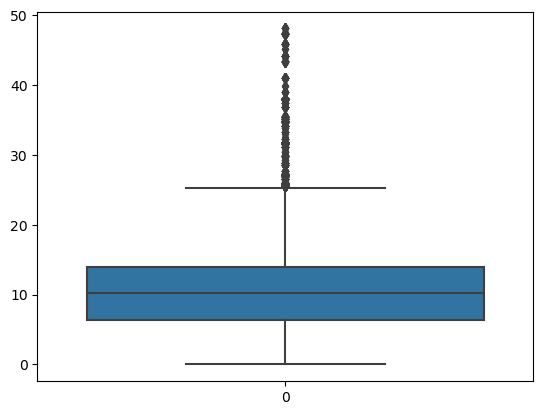

In [16]:
sns.boxplot(data["Distance"])

<Axes: >

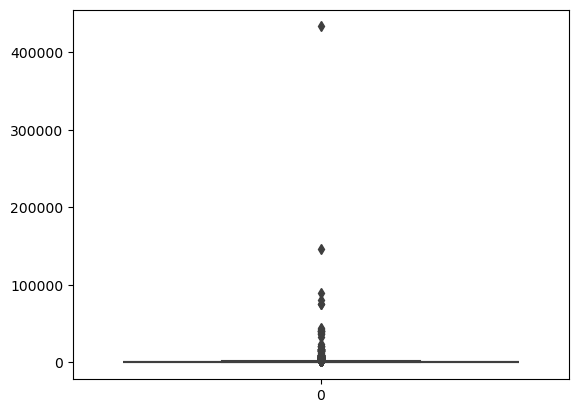

In [17]:
sns.boxplot(data["Landsize"])

<Axes: >

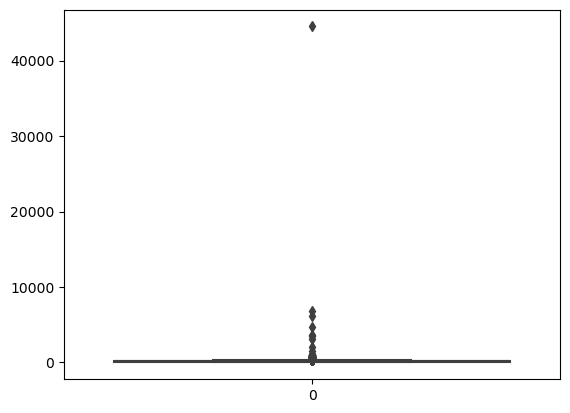

In [18]:
sns.boxplot(data["BuildingArea"])

In [19]:
### capping method using IQR
def outlier_removal(data,columns):
    
    for col in columns:
        feature=data[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        lower_lim=float(q1-1.5*IQR)
        upper_lim=float(q3+1.5*IQR)
        
        ## REMOVING OUTLIERS
        data[col]=np.where(data[col]< lower_lim,lower_lim,data[col])
        data[col]=np.where(data[col]> upper_lim,upper_lim,data[col])
        
    return data


<Axes: >

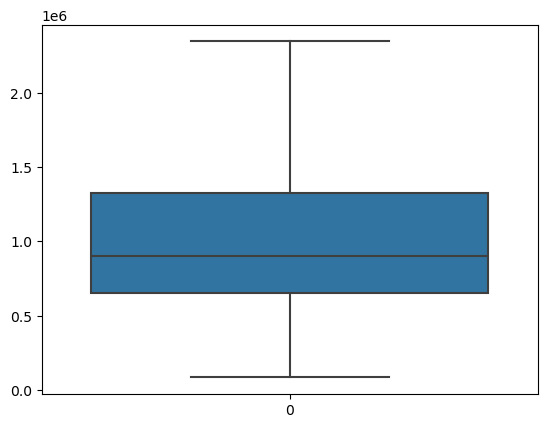

In [20]:
num_col=outlier_removal(num_col,["Price"])
num_col.reset_index(drop=True)

sns.boxplot(num_col["Price"])

<Axes: >

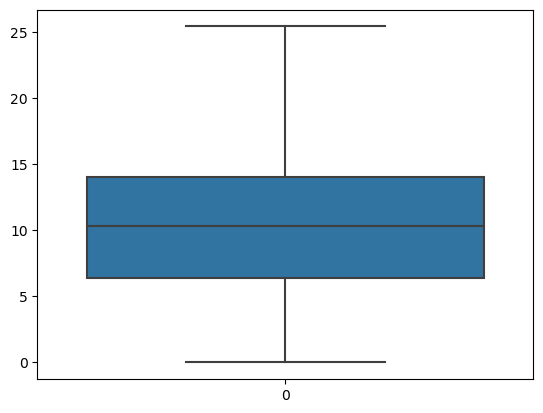

In [21]:
num_col=outlier_removal(num_col,["Distance"])
num_col.reset_index(drop=True)

sns.boxplot(num_col["Distance"])

<Axes: >

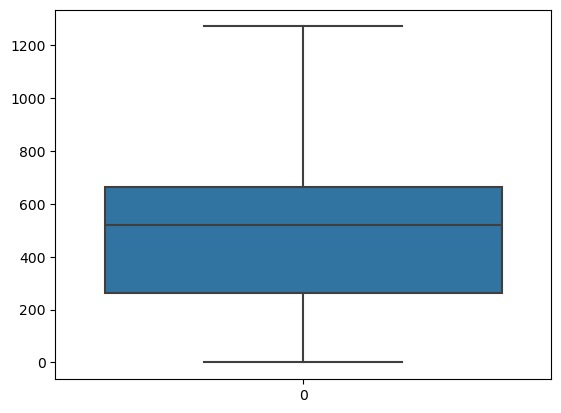

In [56]:
num_col=outlier_removal(num_col,["Landsize"])
num_col.reset_index(drop=True)

sns.boxplot(num_col["Landsize"])

<Axes: >

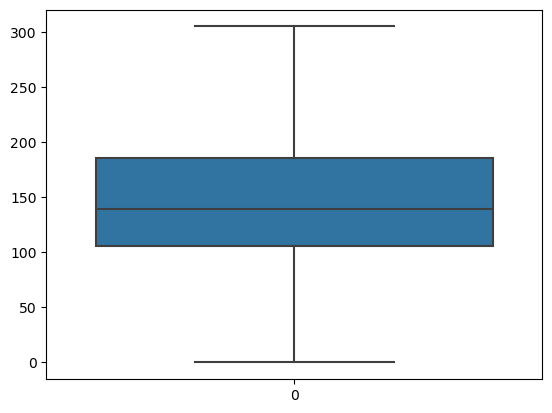

In [22]:
num_col=outlier_removal(num_col,["BuildingArea"])
num_col.reset_index(drop=True)

sns.boxplot(num_col["BuildingArea"])

In [23]:
cat_col.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

In [52]:
cat_col=cat_col.dropna()

In [53]:
cat_col.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [61]:
cat_col["Suburb"].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [62]:
cat_col["Address"].unique()

array(['68 Studley St', '85 Turner St', '25 Bloomburg St', ...,
       '147A Severn St', '12/37 Stephen St', '3 Tarrengower St'],
      dtype=object)

In [63]:
cat_col["Type"].unique()

array(['h', 'u', 't'], dtype=object)

In [64]:
cat_col["Method"].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [65]:
cat_col["SellerG"].unique()

array(['Jellis', 'Biggin', 'Rounds', 'Nelson', 'Collins', 'Dingle',
       'Purplebricks', 'Greg', 'Philip', 'LITTLE', 'Kay', 'Beller',
       'Marshall', 'hockingstuart', 'Brad', 'Maddison', 'Barry',
       'Airport', 'Considine', 'Rendina', 'Ray', 'Propertyau', 'McDonald',
       'Frank', 'Prof.', 'Harcourts', 'Thomson', 'Buxton', 'RT',
       "Sotheby's", 'Cayzer', 'Chisholm', 'McGrath', 'Brace', 'Miles',
       'Holland', 'Love', 'Thomas', 'Barlow', 'Sweeney', 'Village', 'Jas',
       'Williams', 'Gunn&Co', 'Burnham', 'Point', 'Compton', 'FN',
       'Hunter', 'Raine&Horne', 'Noel', 'Hodges', 'Gary', 'Fletchers',
       'Woodards', 'Raine', 'Alexkarbon', 'Walshe', 'Weda', 'Stockdale',
       'Tim', 'Buxton/Marshall', 'AIME', 'Moonee', 'HAR', 'Edward', 'RW',
       'North', 'MICM', 'Ascend', 'Christopher', 'Morrison', 'Bekdon',
       'Mandy', 'R&H', 'Fletchers/One', 'Lindellas', 'Appleby', 'Assisi',
       'One', 'Owen', 'Parkes', 'C21', 'Century', "O'Brien", 'Bayside',
       'And

In [66]:
cat_col["CouncilArea"].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [67]:
cat_col["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

cat_col=pd.get_dummies(cat_col,drop_first=True)

In [54]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
cat_col=cat_col.apply(enc.fit_transform)

In [55]:
cat_col

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,0,29455,0,6,155,4,31,2
1,0,32509,0,2,33,6,31,2
2,0,15386,0,2,33,7,31,2
3,0,9767,2,7,296,7,31,2
4,0,25125,0,5,33,8,31,2
...,...,...,...,...,...,...,...,...
34852,347,5861,0,0,152,59,16,6
34853,347,16979,0,5,321,59,16,6
34854,347,7349,1,2,152,59,16,6
34855,347,5420,0,5,370,59,16,6


from sklearn.preprocessing import LabelEncoder

encoders={}

for col in cat_col:
    encoder=LabelEncoder()
    cat_col[col]=encoder.fit_transform(cat_col[col])
    encoders[col]=encoder
cat_col.head()


In [56]:
data=pd.concat((num_col,cat_col),axis=1)

In [57]:
## find percentage of missing values columns wise
(data.isnull().sum()/len(data))*100

Rooms             0.000000
Price            21.832057
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
Lattitude        22.882061
Longtitude       22.882061
Propertycount     0.008607
Suburb            0.008607
Address           0.008607
Type              0.008607
Method            0.008607
SellerG           0.008607
Date              0.008607
CouncilArea       0.008607
Regionname        0.008607
dtype: float64

In [29]:
data=data.dropna()

In [72]:
#sns.pairplot(data)

In [30]:
data.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Suburb', 'Address', 'Type', 'Method', 'SellerG',
       'Date', 'CouncilArea', 'Regionname'],
      dtype='object')

In [31]:
long_up=180
long_down=-180

lat_up=90
lat_down=-90

data=data[
    (data["Longtitude"]>=long_down)&
    (data["Longtitude"]<=long_up)&
    
    (data["Lattitude"]>= lat_down) &
    (data["Lattitude"]<= lat_up)
]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34854 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34854 non-null  float64
 1   Price          34854 non-null  float64
 2   Distance       34854 non-null  float64
 3   Postcode       34854 non-null  float64
 4   Bedroom2       34854 non-null  float64
 5   Bathroom       34854 non-null  float64
 6   Car            34854 non-null  float64
 7   Landsize       34854 non-null  float64
 8   BuildingArea   34854 non-null  float64
 9   YearBuilt      34854 non-null  int32  
 10  Lattitude      34854 non-null  float64
 11  Longtitude     34854 non-null  float64
 12  Propertycount  34854 non-null  float64
 13  Suburb         34854 non-null  float64
 14  Address        34854 non-null  float64
 15  Type           34854 non-null  float64
 16  Method         34854 non-null  float64
 17  SellerG        34854 non-null  float64
 18  Date       

In [33]:
data=data.drop_duplicates()

In [77]:
data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,2.0,6.823333e+05,2.5,3067.0,2.0,1.000000,1.0,126.000000,79.000000,1981,...,144.99580,4019.0,0.0,29455.0,0.0,6.0,155.0,4.0,31.0,2.0
1,2.0,1.480000e+06,2.5,3067.0,2.0,1.000000,1.0,202.000000,82.333333,1934,...,144.99840,4019.0,0.0,32509.0,0.0,2.0,33.0,6.0,31.0,2.0
2,2.0,1.035000e+06,2.5,3067.0,2.0,1.000000,0.0,156.000000,79.000000,1900,...,144.99340,4019.0,0.0,15386.0,0.0,2.0,33.0,7.0,31.0,2.0
3,3.0,1.242333e+06,2.5,3067.0,3.0,2.000000,1.0,0.000000,106.000000,2006,...,145.01160,4019.0,0.0,9767.0,2.0,7.0,296.0,7.0,31.0,2.0
4,3.0,1.465000e+06,2.5,3067.0,3.0,2.000000,0.0,134.000000,150.000000,1900,...,144.99440,4019.0,0.0,25125.0,0.0,5.0,33.0,8.0,31.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4.0,1.480000e+06,6.3,3013.0,4.0,1.000000,3.0,593.000000,174.666667,1983,...,144.88467,6543.0,347.0,5861.0,0.0,0.0,152.0,59.0,16.0,6.0
34853,2.0,8.880000e+05,6.3,3013.0,2.0,2.000000,1.0,98.000000,104.000000,2018,...,144.88826,6543.0,347.0,16979.0,0.0,5.0,321.0,59.0,16.0,6.0
34854,2.0,7.050000e+05,6.3,3013.0,2.0,1.000000,2.0,220.000000,120.000000,2000,...,144.87856,6543.0,347.0,7349.0,1.0,2.0,152.0,59.0,16.0,6.0
34855,3.0,1.140000e+06,6.3,3013.0,3.0,1.333333,2.0,331.666667,130.333333,1963,...,144.88932,6543.0,347.0,5420.0,0.0,5.0,370.0,59.0,16.0,6.0


In [34]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34853.000000,3.485300e+04,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,...,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000
mean,3.031073,1.045927e+06,10.904109,3116.065217,3.029629,1.603219,1.695980,589.409424,150.011709,1966.072505,...,145.003370,7572.962901,170.952228,17001.288297,0.521361,2.712937,184.639916,39.067455,13.670559,3.663558
std,0.969957,5.277933e+05,5.901099,109.027105,0.955123,0.681674,0.936954,2917.612662,62.671806,31.105764,...,0.117737,4428.131940,100.133464,9811.949306,0.817457,1.988453,110.283786,22.217053,9.935742,2.051087
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,...,144.423790,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.500000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,261.000000,106.000000,1950.000000,...,144.935980,4385.000000,78.000000,8503.000000,0.000000,2.000000,101.000000,20.000000,3.000000,2.000000
50%,3.000000,8.990000e+05,10.300000,3103.000000,3.000000,1.333333,2.000000,521.333333,139.000000,1970.000000,...,145.009567,6763.000000,170.000000,16982.000000,0.000000,2.000000,198.000000,41.000000,12.000000,5.000000
75%,4.000000,1.328667e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,665.000000,185.666667,1989.000000,...,145.072290,10412.000000,260.000000,25496.000000,1.000000,4.000000,275.000000,59.000000,22.000000,5.000000
max,16.000000,2.345000e+06,25.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,305.166667,2106.000000,...,145.526350,21650.000000,349.000000,34005.000000,2.000000,8.000000,387.000000,77.000000,32.000000,7.000000


In [35]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [36]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
import catboost as ca
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
lis=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,KNeighborsRegressor,xg.XGBRegressor,ca.CatBoostRegressor]

In [40]:
output_result = {
    "model": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "Mean_a_error": [],
    "Mean_square_error": [],
    "root_mean_square_error": [],
    "r2_error": []
}

In [41]:
for model_class in lis:
    model=model_class()
    model.fit(x_train,y_train)
    
    model_name=model_class.__name__
    output_result["model"].append(model_name)
    print(f"Model Name:-->{model_name}")
    
    train_acc=round(model.score(x_train,y_train)*100,2)
    output_result["train_accuracy"].append(train_acc)
    print(f"Train_accuracy:-->{train_acc}")
    
    test_acc=model.score(x_test,y_test)
    output_result["test_accuracy"].append(test_acc)
    print(f"Test Accuracy:-->{test_acc}")
    
    y_pred= model.predict(x_test)
    
    MAE=mean_absolute_error(y_test,y_pred)
    output_result["Mean_a_error"].append(MAE)
    print(f"MAE:--->{MAE}")
    
    MSE=mean_squared_error(y_test,y_pred)
    output_result["Mean_square_error"].append(MSE)
    print(f"MSE:--->{MSE}")
    
    RMSE=np.sqrt(MSE)
    output_result["root_mean_square_error"].append(RMSE)
    print(f"RMSE:--->{RMSE}")
    
    R2= r2_score(y_test,y_pred)
    output_result["r2_error"].append(R2)
    print(f"R2 score:--->{R2}")
    print("\n\n")
    

Model Name:-->LinearRegression
Train_accuracy:-->66.39
Test Accuracy:-->0.6483634756393928
MAE:--->233584.61167865552
MSE:--->96520889305.67776
RMSE:--->310678.1120479487
R2 score:--->0.6483634756393928



Model Name:-->Lasso
Train_accuracy:-->66.39
Test Accuracy:-->0.6483627569616236
MAE:--->233584.62731605297
MSE:--->96521086575.90599
RMSE:--->310678.42953109246
R2 score:--->0.6483627569616236



Model Name:-->Ridge
Train_accuracy:-->66.39
Test Accuracy:-->0.6483408552487129
MAE:--->233584.38158237693
MSE:--->96527098388.27757
RMSE:--->310688.1046777903
R2 score:--->0.6483408552487129



Model Name:-->DecisionTreeRegressor
Train_accuracy:-->100.0
Test Accuracy:-->0.6794132922483174
MAE:--->192867.3656099077
MSE:--->87998009274.02843
RMSE:--->296644.5840969095
R2 score:--->0.6794132922483174



Model Name:-->RandomForestRegressor
Train_accuracy:-->97.7
Test Accuracy:-->0.8335350488045881
MAE:--->144237.6761115096
MSE:--->45693049539.78606
RMSE:--->213759.3262053987
R2 score:--->0.8335

120:	learn: 228221.7310431	total: 2.3s	remaining: 16.7s
121:	learn: 228041.6276883	total: 2.32s	remaining: 16.7s
122:	learn: 227917.4498021	total: 2.34s	remaining: 16.7s
123:	learn: 227760.7513807	total: 2.35s	remaining: 16.6s
124:	learn: 227620.0681930	total: 2.37s	remaining: 16.6s
125:	learn: 227448.0761858	total: 2.39s	remaining: 16.6s
126:	learn: 227279.4304966	total: 2.4s	remaining: 16.5s
127:	learn: 227139.5582514	total: 2.42s	remaining: 16.5s
128:	learn: 227026.2785546	total: 2.44s	remaining: 16.5s
129:	learn: 226930.6458419	total: 2.46s	remaining: 16.4s
130:	learn: 226626.5977169	total: 2.47s	remaining: 16.4s
131:	learn: 226486.1040206	total: 2.49s	remaining: 16.4s
132:	learn: 226380.2143465	total: 2.52s	remaining: 16.4s
133:	learn: 226272.1061596	total: 2.55s	remaining: 16.5s
134:	learn: 226144.7630497	total: 2.57s	remaining: 16.5s
135:	learn: 226005.4252125	total: 2.6s	remaining: 16.5s
136:	learn: 225867.2434905	total: 2.63s	remaining: 16.6s
137:	learn: 225763.9993364	total: 

270:	learn: 211966.4170247	total: 5.15s	remaining: 13.8s
271:	learn: 211901.6546101	total: 5.17s	remaining: 13.8s
272:	learn: 211845.2955520	total: 5.18s	remaining: 13.8s
273:	learn: 211783.6263044	total: 5.2s	remaining: 13.8s
274:	learn: 211678.3390926	total: 5.21s	remaining: 13.7s
275:	learn: 211633.6638788	total: 5.23s	remaining: 13.7s
276:	learn: 211577.2832966	total: 5.24s	remaining: 13.7s
277:	learn: 211490.4285613	total: 5.26s	remaining: 13.7s
278:	learn: 211438.5988452	total: 5.28s	remaining: 13.6s
279:	learn: 211344.1696420	total: 5.29s	remaining: 13.6s
280:	learn: 211231.4082066	total: 5.31s	remaining: 13.6s
281:	learn: 211146.0687998	total: 5.33s	remaining: 13.6s
282:	learn: 211060.7797893	total: 5.34s	remaining: 13.5s
283:	learn: 211005.7975229	total: 5.36s	remaining: 13.5s
284:	learn: 210931.3267179	total: 5.38s	remaining: 13.5s
285:	learn: 210888.2158341	total: 5.39s	remaining: 13.5s
286:	learn: 210882.4647147	total: 5.41s	remaining: 13.4s
287:	learn: 210867.4827258	total

422:	learn: 203338.4067816	total: 7.74s	remaining: 10.6s
423:	learn: 203276.5053246	total: 7.76s	remaining: 10.5s
424:	learn: 203245.8518803	total: 7.78s	remaining: 10.5s
425:	learn: 203198.1271827	total: 7.79s	remaining: 10.5s
426:	learn: 203167.0591910	total: 7.81s	remaining: 10.5s
427:	learn: 203118.0876135	total: 7.83s	remaining: 10.5s
428:	learn: 203056.9654420	total: 7.84s	remaining: 10.4s
429:	learn: 203015.7335239	total: 7.86s	remaining: 10.4s
430:	learn: 202989.6984402	total: 7.88s	remaining: 10.4s
431:	learn: 202945.5313326	total: 7.9s	remaining: 10.4s
432:	learn: 202903.3951772	total: 7.91s	remaining: 10.4s
433:	learn: 202834.8331210	total: 7.93s	remaining: 10.3s
434:	learn: 202782.0065642	total: 7.95s	remaining: 10.3s
435:	learn: 202763.7352268	total: 7.96s	remaining: 10.3s
436:	learn: 202687.3699004	total: 7.98s	remaining: 10.3s
437:	learn: 202674.3675414	total: 7.99s	remaining: 10.3s
438:	learn: 202618.3459033	total: 8.01s	remaining: 10.2s
439:	learn: 202569.8797375	total

574:	learn: 196620.8890070	total: 10.3s	remaining: 7.62s
575:	learn: 196582.9975872	total: 10.3s	remaining: 7.6s
576:	learn: 196522.7121197	total: 10.3s	remaining: 7.58s
577:	learn: 196495.3795370	total: 10.4s	remaining: 7.56s
578:	learn: 196463.6999225	total: 10.4s	remaining: 7.54s
579:	learn: 196414.5926644	total: 10.4s	remaining: 7.52s
580:	learn: 196356.2421800	total: 10.4s	remaining: 7.5s
581:	learn: 196309.8638234	total: 10.4s	remaining: 7.49s
582:	learn: 196261.9923363	total: 10.4s	remaining: 7.47s
583:	learn: 196219.4140178	total: 10.5s	remaining: 7.45s
584:	learn: 196168.2174811	total: 10.5s	remaining: 7.43s
585:	learn: 196152.4348449	total: 10.5s	remaining: 7.41s
586:	learn: 196109.6431116	total: 10.5s	remaining: 7.4s
587:	learn: 196047.6789265	total: 10.5s	remaining: 7.38s
588:	learn: 196036.1211076	total: 10.5s	remaining: 7.36s
589:	learn: 196012.0185636	total: 10.6s	remaining: 7.34s
590:	learn: 195961.5656509	total: 10.6s	remaining: 7.32s
591:	learn: 195960.4424465	total: 

728:	learn: 190781.7845332	total: 12.9s	remaining: 4.79s
729:	learn: 190727.4797186	total: 12.9s	remaining: 4.78s
730:	learn: 190686.5713922	total: 12.9s	remaining: 4.76s
731:	learn: 190664.8630228	total: 12.9s	remaining: 4.74s
732:	learn: 190655.8283154	total: 13s	remaining: 4.72s
733:	learn: 190590.5203129	total: 13s	remaining: 4.7s
734:	learn: 190564.5448119	total: 13s	remaining: 4.69s
735:	learn: 190505.5808372	total: 13s	remaining: 4.67s
736:	learn: 190481.4557617	total: 13s	remaining: 4.65s
737:	learn: 190430.1563434	total: 13s	remaining: 4.63s
738:	learn: 190380.1922934	total: 13.1s	remaining: 4.61s
739:	learn: 190346.7353360	total: 13.1s	remaining: 4.6s
740:	learn: 190307.1007565	total: 13.1s	remaining: 4.58s
741:	learn: 190260.2105362	total: 13.1s	remaining: 4.56s
742:	learn: 190203.4240826	total: 13.1s	remaining: 4.54s
743:	learn: 190164.1615572	total: 13.2s	remaining: 4.53s
744:	learn: 190137.4320790	total: 13.2s	remaining: 4.51s
745:	learn: 190060.7040838	total: 13.2s	remai

878:	learn: 185180.8351429	total: 15.7s	remaining: 2.17s
879:	learn: 185130.4767098	total: 15.8s	remaining: 2.15s
880:	learn: 185073.3428704	total: 15.8s	remaining: 2.13s
881:	learn: 185038.3614846	total: 15.8s	remaining: 2.11s
882:	learn: 185022.8144378	total: 15.8s	remaining: 2.09s
883:	learn: 184977.6926401	total: 15.8s	remaining: 2.08s
884:	learn: 184959.2484726	total: 15.8s	remaining: 2.06s
885:	learn: 184925.9595250	total: 15.9s	remaining: 2.04s
886:	learn: 184894.1540627	total: 15.9s	remaining: 2.02s
887:	learn: 184853.6357898	total: 15.9s	remaining: 2s
888:	learn: 184833.7911312	total: 15.9s	remaining: 1.99s
889:	learn: 184807.1447156	total: 15.9s	remaining: 1.97s
890:	learn: 184771.6934885	total: 15.9s	remaining: 1.95s
891:	learn: 184759.2157742	total: 16s	remaining: 1.93s
892:	learn: 184723.4247511	total: 16s	remaining: 1.91s
893:	learn: 184695.2145323	total: 16s	remaining: 1.9s
894:	learn: 184658.7680776	total: 16s	remaining: 1.88s
895:	learn: 184646.9095018	total: 16s	remai

In [87]:
pd.set_option('display.float_format',lambda x: '% .3f'%x)

In [88]:
output_result1=pd.DataFrame(output_result)
output_result1.sort_values(by="Mean_a_error")

,model,train_accuracy,test_accuracy,Mean_a_error,Mean_square_error,root_mean_square_error,r2_error
4,RandomForestRegressor,97.700,0.834,143854.818,45549941061.869,213424.322,0.834
8,CatBoostRegressor,88.210,0.837,145699.684,44610329738.542,211211.576,0.837
7,XGBRegressor,91.120,0.829,149314.057,46944145240.065,216665.976,0.829
5,GradientBoostingRegressor,80.070,0.791,167900.086,57378085213.827,239537.231,0.791
3,DecisionTreeRegressor,100.000,0.677,194141.554,88726214094.184,297869.458,0.677
2,Ridge,66.640,0.652,232639.883,95601086733.713,309194.254,0.652
0,LinearRegression,66.640,0.652,232640.061,95595178605.823,309184.700,0.652
1,Lasso,66.640,0.652,232640.064,95595361050.506,309184.995,0.652
6,KNeighborsRegressor,55.580,0.302,329342.396,191587342765.568,437706.914,0.302


In [265]:
#So Catboost gives best result interms of MAE, Let's tune it
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
model = ca.CatBoostRegressor(verbose=0)  # Verbose=0 to suppress output

# Define the parameter grid
param_distributions = {
    'iterations': np.arange(100, 1000, step=100),
    'learning_rate': np.logspace(-3, 0, num=10),
    'depth': np.arange(3, 10),
    'l2_leaf_reg': np.linspace(1, 10, num=10),
    'bagging_temperature': np.linspace(0, 1, num=10),
    'border_count': np.arange(32, 256, step=32)
}
# Define K-Folds Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    cv=kf,  # Cross-validation strategy
    verbose=1,
    n_jobs=-1,  # Use all available cores
    scoring='neg_mean_squared_error',  # Metric to optimize
    random_state=42
)

In [266]:
# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001175CB27490>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_temperature': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'border_count': array([ 32,  64,  96, 128, 160, 192, 224]),
                                        'depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'iterations': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'l2_leaf_reg': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [267]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)  # Remember the score is negative MSE

Best Parameters: {'learning_rate': 0.046415888336127774, 'l2_leaf_reg': 4.0, 'iterations': 900, 'depth': 7, 'border_count': 128, 'bagging_temperature': 0.1111111111111111}
Best Score: 57793407364.65975


In [268]:
best_params= random_search.best_params_
final_model=ca.CatBoostRegressor(**best_params,verbose=0)

In [269]:
final_model.fit(x_train,y_train)

In [270]:
train_accuracy=round(final_model.score(x_train,y_train)*100,2)
test_accuracy=round(final_model.score(x_test,y_test)*100,2)
y_pred=final_model.predict(x_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_pred)



print(f"Train_accuracy: {train_accuracy}")
print(f"Test_accuracy: {test_accuracy}")
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error {MSE}")
print(f"R2 squared Error: {R2}")

Train_accuracy: 70.6
Test_accuracy: 63.3
Mean Absolute Error: 188852.55630632152
Mean Squared Error 57647509495.93061
R2 squared Error: 0.6330201823395504
